In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy.stats import linregress
import json
import requests
import seaborn as sns
from datetime import datetime,date
from datetime import date
import hvplot.pandas
import pytz
import folium
import geopandas as gpd
import sweetviz as sv
# Set the option to raise an error instead of a warning for chained assignments
pd.options.mode.chained_assignment = 'raise'

# Your code here

# Reset the option back to the default behavior (optional)
pd.options.mode.chained_assignment = None

In [6]:
#Petfinder API Wrapper
# pf= petpy.Petfinder(key=api_key ,secret=client_secret)

dogs = pd.read_csv("../Datasets/merged_dog_data.csv")


In [4]:
report = sv.analyze(dogs, target_feat='days_on_petfinder')
report.show_html('svreport.html')

                                             |          | [  0%]   00:00 -> (? left)

Report svreport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [7]:
#Find Listed Animals on Petfinder for animal type dog and status adoptable
dogs.head()


,Unnamed: 0,id,organization_id,organization_id.1,url,species,age,gender,size,coat,...,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id.2,organization_id.3,days_on_petfinder,today,adoptable_days_online
0,0,69339698,IL145,il145,https://www.petfinder.com/dog/maisy-69339698/i...,Dog,Young,Female,Large,Short,...,IL,60477,US,69339698,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
1,1,69339658,IL145,il145,https://www.petfinder.com/dog/travis-kelce-693...,Dog,Baby,Male,Medium,Short,...,IL,60477,US,69339658,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
2,2,69339553,IL145,il145,https://www.petfinder.com/dog/fat-boy-69339553...,Dog,Young,Male,Small,Long,...,IL,60477,US,69339553,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
3,3,69339397,IL145,il145,https://www.petfinder.com/dog/perdita-69339397...,Dog,Young,Female,Large,Short,...,IL,60477,US,69339397,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
4,4,69339271,IL145,il145,https://www.petfinder.com/dog/marcus-69339271/...,Dog,Young,Male,Large,Medium,...,IL,60477,US,69339271,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0


In [8]:
#Drop  duplicate records with same id
dogs.drop_duplicates(subset=['id'],inplace=True)

dogs.id.value_counts

<bound method IndexOpsMixin.value_counts of 0       69339698
1       69339658
2       69339553
3       69339397
4       69339271
          ...   
7995    66447254
7996    66447260
7997    66447266
7998    66447273
7999    66447278
Name: id, Length: 7934, dtype: int64>

In [13]:
dogs

,Unnamed: 0,id,organization_id,organization_id.1,url,species,age,gender,size,coat,...,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id.2,organization_id.3,days_on_petfinder,today,adoptable_days_online
0,0,69339698,IL145,il145,https://www.petfinder.com/dog/maisy-69339698/i...,Dog,Young,Female,Large,Short,...,IL,60477,US,69339698,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
1,1,69339658,IL145,il145,https://www.petfinder.com/dog/travis-kelce-693...,Dog,Baby,Male,Medium,Short,...,IL,60477,US,69339658,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
2,2,69339553,IL145,il145,https://www.petfinder.com/dog/fat-boy-69339553...,Dog,Young,Male,Small,Long,...,IL,60477,US,69339553,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
3,3,69339397,IL145,il145,https://www.petfinder.com/dog/perdita-69339397...,Dog,Young,Female,Large,Short,...,IL,60477,US,69339397,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
4,4,69339271,IL145,il145,https://www.petfinder.com/dog/marcus-69339271/...,Dog,Young,Male,Large,Medium,...,IL,60477,US,69339271,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7995,66447254,IL81,il81,https://www.petfinder.com/dog/fergie-66447254/...,Dog,Adult,Female,Medium,NaN,...,IL,60135,US,66447254,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56
7996,7996,66447260,IL81,il81,https://www.petfinder.com/dog/06-0617-66447260...,Dog,Adult,Male,Medium,NaN,...,IL,60135,US,66447260,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56
7997,7997,66447266,IL81,il81,https://www.petfinder.com/dog/emmitt-66447266/...,Dog,Senior,Male,Medium,NaN,...,IL,60135,US,66447266,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56
7998,7998,66447273,IL81,il81,https://www.petfinder.com/dog/bella-66447273/i...,Dog,Adult,Female,Medium,NaN,...,IL,60135,US,66447273,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56


In [9]:
#Find Listed Animals on Petfinder for animal type dog and status adopted
adopted_dogs =  dogs[dogs["status"] == "adopted"]
adopted_dogs

,Unnamed: 0,id,organization_id,organization_id.1,url,species,age,gender,size,coat,...,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id.2,organization_id.3,days_on_petfinder,today,adoptable_days_online
4000,4000,69340177,IL145,il145,https://www.petfinder.com/dog/splatter-6934017...,Dog,Baby,Male,Medium,Short,...,IL,60477,US,69340177,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
4001,4001,69340121,IL145,il145,https://www.petfinder.com/dog/cruze-69340121/i...,Dog,Baby,Male,Medium,Short,...,IL,60477,US,69340121,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
4002,4002,69338995,IL976,il976,https://www.petfinder.com/dog/y10f-parcheesi-6...,Dog,Baby,Female,Medium,NaN,...,IL,60136,US,69338995,dog,IL976,il976,0.0,2023-10-17 21:42:51.576571-05:00,0
4003,4003,69337958,WI542,wi542,https://www.petfinder.com/dog/andie-69337958/w...,Dog,Baby,Female,Small,NaN,...,WI,53168,US,69337958,dog,WI542,wi542,0.0,2023-10-17 21:42:51.576571-05:00,0
4004,4004,69337131,IL81,il81,https://www.petfinder.com/dog/benji-69337131/i...,Dog,Baby,Male,Medium,NaN,...,IL,60135,US,69337131,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7995,66447254,IL81,il81,https://www.petfinder.com/dog/fergie-66447254/...,Dog,Adult,Female,Medium,NaN,...,IL,60135,US,66447254,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56
7996,7996,66447260,IL81,il81,https://www.petfinder.com/dog/06-0617-66447260...,Dog,Adult,Male,Medium,NaN,...,IL,60135,US,66447260,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56
7997,7997,66447266,IL81,il81,https://www.petfinder.com/dog/emmitt-66447266/...,Dog,Senior,Male,Medium,NaN,...,IL,60135,US,66447266,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56
7998,7998,66447273,IL81,il81,https://www.petfinder.com/dog/bella-66447273/i...,Dog,Adult,Female,Medium,NaN,...,IL,60135,US,66447273,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56


In [7]:
# #Drop  duplicate records with same id
# adopted_dogs.drop_duplicates(subset=['id'],inplace=True)

In [10]:
adoptable_dogs =  dogs[dogs["status"] == "adoptable"]
adoptable_dogs

,Unnamed: 0,id,organization_id,organization_id.1,url,species,age,gender,size,coat,...,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id.2,organization_id.3,days_on_petfinder,today,adoptable_days_online
0,0,69339698,IL145,il145,https://www.petfinder.com/dog/maisy-69339698/i...,Dog,Young,Female,Large,Short,...,IL,60477,US,69339698,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
1,1,69339658,IL145,il145,https://www.petfinder.com/dog/travis-kelce-693...,Dog,Baby,Male,Medium,Short,...,IL,60477,US,69339658,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
2,2,69339553,IL145,il145,https://www.petfinder.com/dog/fat-boy-69339553...,Dog,Young,Male,Small,Long,...,IL,60477,US,69339553,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
3,3,69339397,IL145,il145,https://www.petfinder.com/dog/perdita-69339397...,Dog,Young,Female,Large,Short,...,IL,60477,US,69339397,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
4,4,69339271,IL145,il145,https://www.petfinder.com/dog/marcus-69339271/...,Dog,Young,Male,Large,Medium,...,IL,60477,US,69339271,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,60267962,IL979,il979,https://www.petfinder.com/dog/charlotte-aka-ch...,Dog,Adult,Female,Medium,Short,...,IL,60439,US,60267962,dog,IL979,il979,143.0,2023-10-17 21:42:51.576571-05:00,230
3996,3996,60261648,IL267,il267,https://www.petfinder.com/dog/grady-60261648/i...,Dog,Baby,Male,Medium,NaN,...,IL,60185,US,60261648,dog,IL267,il267,0.0,2023-10-17 21:42:51.576571-05:00,230
3997,3997,60194278,IL513,il513,https://www.petfinder.com/dog/becky-60194278/i...,Dog,Young,Female,Large,Short,...,IL,60061,US,60194278,dog,IL513,il513,0.0,2023-10-17 21:42:51.576571-05:00,232
3998,3998,60193689,IL72,il72,https://www.petfinder.com/dog/janis-60193689/i...,Dog,Young,Female,Medium,NaN,...,IL,60614,US,60193689,dog,IL72,il72,0.0,2023-10-17 21:42:51.576571-05:00,232


In [11]:
#Identify Duplicate Index Values
duplicate_indices_dogs = dogs.index[dogs.index.duplicated(keep=False)]
duplicate_indices_adopted_dogs = adopted_dogs.index[adopted_dogs.index.duplicated(keep=False)]

In [12]:
#Remove Duplicate Index Values
dogs.reset_index(drop=True, inplace=True)
adopted_dogs.reset_index(drop=True, inplace=True)

In [13]:
#Concatenate the DataFrames:
merged = pd.concat([dogs, adopted_dogs],ignore_index=True)

In [24]:
merged_df = merged[['id', 'organization_id', 'url', 'species', 'age', 'gender',
       'size', 'coat', 'tags', 'name', 'description', 'organization_animal_id',
       'photos', 'status', 'status_changed_at', 'published_at',
       'distance', 'breeds.primary', 'breeds.secondary', 'breeds.mixed',
       'breeds.unknown', 'colors.primary', 'colors.secondary',
       'colors.tertiary','attributes.special_needs', 'attributes.shots_current',
       'environment.children', 'environment.dogs', 'environment.cats',
       'contact.address.address1',
       'contact.address.address2', 'contact.address.city',
       'contact.address.state', 'contact.address.postcode',
       'contact.address.country', 'animal_id', 'animal_type',
       'organization_id']]



In [25]:
merged_df.columns

Index(['id', 'organization_id', 'url', 'species', 'age', 'gender', 'size',
       'coat', 'tags', 'name', 'description', 'organization_animal_id',
       'photos', 'status', 'status_changed_at', 'published_at', 'distance',
       'breeds.primary', 'breeds.secondary', 'breeds.mixed', 'breeds.unknown',
       'colors.primary', 'colors.secondary', 'colors.tertiary',
       'attributes.special_needs', 'attributes.shots_current',
       'environment.children', 'environment.dogs', 'environment.cats',
       'contact.address.address1', 'contact.address.address2',
       'contact.address.city', 'contact.address.state',
       'contact.address.postcode', 'contact.address.country', 'animal_id',
       'animal_type', 'organization_id'],
      dtype='object')

In [16]:
dogs['published_at'] = pd.to_datetime(dogs['published_at'])
dogs['status_changed_at'] = pd.to_datetime(dogs['status_changed_at'])


In [17]:
dogs['days_on_petfinder'] = (dogs['status_changed_at'] - dogs['published_at']).dt.days
dogs['days_on_petfinder'] = dogs['days_on_petfinder'].round()

In [14]:
today = datetime.now()

dogs['today']= datetime.now()

In [18]:
central_timezone = pytz.timezone('US/Central')
aware_datetime = today.astimezone(central_timezone)
aware_datetime

datetime.datetime(2023, 10, 21, 21, 3, 56, 29590, tzinfo=<DstTzInfo 'US/Central' CDT-1 day, 19:00:00 DST>)

In [19]:
dogs['today'] = aware_datetime

dogs['adoptable_days_online'] =(dogs['today'] - dogs['published_at']).dt.days

In [20]:
address_df = dogs.iloc[:,30:36]
address_df

,environment.cats,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode
0,NaN,8301 West 191st Street,NaN,Tinley Park,IL,60477
1,NaN,8301 West 191st Street,NaN,Tinley Park,IL,60477
2,NaN,8301 West 191st Street,NaN,Tinley Park,IL,60477
3,NaN,8301 West 191st Street,NaN,Tinley Park,IL,60477
4,NaN,8301 West 191st Street,NaN,Tinley Park,IL,60477
...,...,...,...,...,...,...
7929,NaN,16173 Baseline Road,NaN,Genoa,IL,60135
7930,NaN,16173 Baseline Road,NaN,Genoa,IL,60135
7931,NaN,16173 Baseline Road,NaN,Genoa,IL,60135
7932,False,16173 Baseline Road,NaN,Genoa,IL,60135


In [21]:

address_df['combined_address'] = address_df.apply(lambda row: ', '.join(str(x) for x in row), axis=1)
address_df


,environment.cats,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,combined_address
0,NaN,8301 West 191st Street,NaN,Tinley Park,IL,60477,"nan, 8301 West 191st Street, nan, Tinley Park,..."
1,NaN,8301 West 191st Street,NaN,Tinley Park,IL,60477,"nan, 8301 West 191st Street, nan, Tinley Park,..."
2,NaN,8301 West 191st Street,NaN,Tinley Park,IL,60477,"nan, 8301 West 191st Street, nan, Tinley Park,..."
3,NaN,8301 West 191st Street,NaN,Tinley Park,IL,60477,"nan, 8301 West 191st Street, nan, Tinley Park,..."
4,NaN,8301 West 191st Street,NaN,Tinley Park,IL,60477,"nan, 8301 West 191st Street, nan, Tinley Park,..."
...,...,...,...,...,...,...,...
7929,NaN,16173 Baseline Road,NaN,Genoa,IL,60135,"nan, 16173 Baseline Road, nan, Genoa, IL, 60135"
7930,NaN,16173 Baseline Road,NaN,Genoa,IL,60135,"nan, 16173 Baseline Road, nan, Genoa, IL, 60135"
7931,NaN,16173 Baseline Road,NaN,Genoa,IL,60135,"nan, 16173 Baseline Road, nan, Genoa, IL, 60135"
7932,False,16173 Baseline Road,NaN,Genoa,IL,60135,"False, 16173 Baseline Road, nan, Genoa, IL, 60135"


In [33]:
dogs['address'] = address_df['combined_address']

In [22]:
dogs.to_csv("merged_dog_data.csv")

In [24]:
dogs.columns

Index(['Unnamed: 0', 'id', 'organization_id', 'organization_id.1', 'url',
       'species', 'age', 'gender', 'size', 'coat', 'tags', 'name',
       'description', 'organization_animal_id', 'photos', 'status',
       'status_changed_at', 'published_at', 'distance', 'breeds.primary',
       'breeds.secondary', 'breeds.mixed', 'breeds.unknown', 'colors.primary',
       'colors.secondary', 'colors.tertiary', 'attributes.special_needs',
       'attributes.shots_current', 'environment.children', 'environment.dogs',
       'environment.cats', 'contact.address.address1',
       'contact.address.address2', 'contact.address.city',
       'contact.address.state', 'contact.address.postcode',
       'contact.address.country', 'animal_id', 'animal_type',
       'organization_id.2', 'organization_id.3', 'days_on_petfinder', 'today',
       'adoptable_days_online'],
      dtype='object')

Dogs average days for adaption by color

In [25]:
# correct - verified by csv
dogs_data_adopted = adopted_dogs.groupby(['colors.primary'] ,as_index=False)['days_on_petfinder'].mean().round().sort_values(by ='days_on_petfinder',ascending=False).head(10)
dogs_data_adopted

,colors.primary,days_on_petfinder
5,Golden,16.0
10,Red / Chestnut / Orange,14.0
1,Bicolor,13.0
2,Black,13.0
3,Brindle,13.0
6,Gray / Blue / Silver,13.0
8,Merle (Blue),13.0
12,"Tricolor (Brown, Black, & White)",13.0
13,White / Cream,13.0
4,Brown / Chocolate,12.0


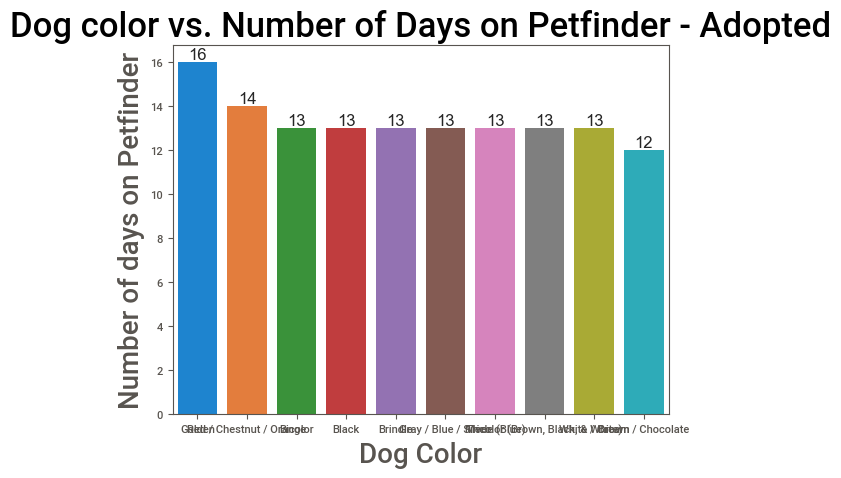

In [26]:

#Sets the size of the bars

ax =sns.barplot(x = 'colors.primary',data = dogs_data_adopted,y ='days_on_petfinder')
sns.set(rc={'figure.figsize':(25,10)})

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Dog color vs. Number of Days on Petfinder - Adopted",fontsize=25)
plt.xlabel("Dog Color",fontsize=20)
plt.ylabel("Number of days on Petfinder",fontsize=20)
plt.show()

Dogs average days which a adoptable  by color

In [27]:
dogs_data_adoptable = adoptable_dogs.groupby(['colors.primary'] ,as_index=False)['adoptable_days_online'].mean().sort_values(by ='adoptable_days_online',ascending=False).round().head(10)
dogs_data_adoptable

,colors.primary,adoptable_days_online
11,Sable,93.0
7,Harlequin,86.0
8,Merle (Blue),66.0
5,Golden,60.0
10,Red / Chestnut / Orange,59.0
6,Gray / Blue / Silver,58.0
4,Brown / Chocolate,58.0
9,Merle (Red),56.0
3,Brindle,56.0
14,Yellow / Tan / Blond / Fawn,52.0


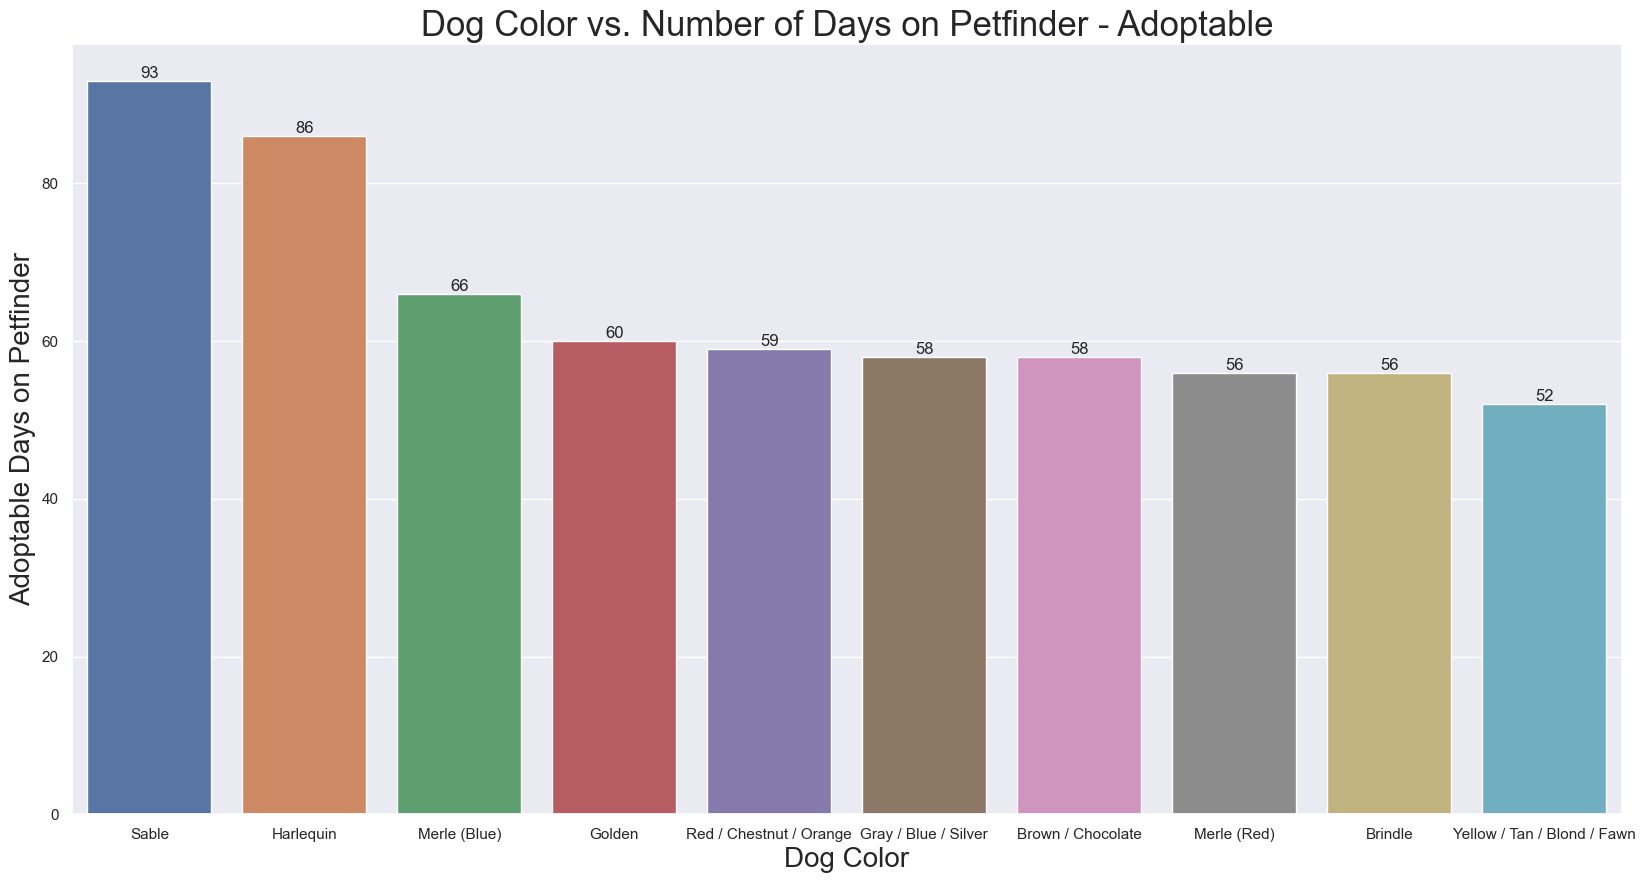

In [63]:
# this is also not correct because it needs to pull from the 'adoptable dogs' data frame instead of all dogs.


#Sets the size of the bars
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x = 'colors.primary',data = dogs_data_adoptable,y ='adoptable_days_online')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Dog Color', fontsize = 20)
plt.ylabel('Adoptable Days on Petfinder', fontsize = 20)
plt.title('Dog Color vs. Number of Days on Petfinder - Adoptable', fontsize = 25)
plt.show()

***Total percentage of Dogs which were adpoted or adoptable by color***

In [28]:
color_counts = dogs['colors.primary'].value_counts()
color_counts

colors.primary
Black                               920
White / Cream                       588
Yellow / Tan / Blond / Fawn         358
Brown / Chocolate                   301
Tricolor (Brown, Black, & White)    248
Brindle                             228
Red / Chestnut / Orange             178
Apricot / Beige                     172
Gray / Blue / Silver                168
Bicolor                             155
Golden                               87
Merle (Blue)                         28
Sable                                24
Merle (Red)                          10
Harlequin                             4
Name: count, dtype: int64

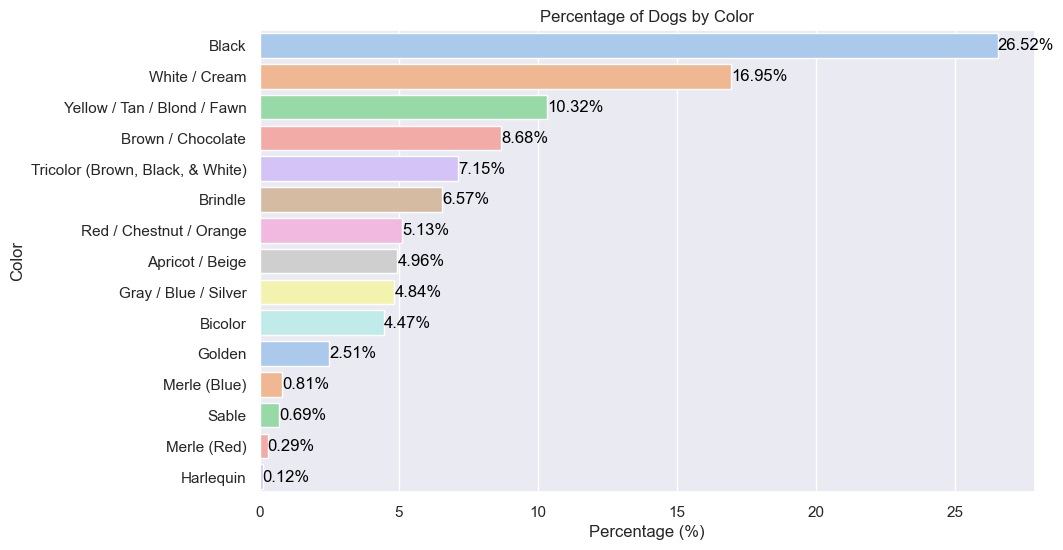

In [29]:
color_counts = dogs['colors.primary'].value_counts()
# Calculate the percentages
total_count = color_counts.sum()
color_percentages = (color_counts / total_count) * 100

# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(x=color_percentages, y=color_counts.index, palette='pastel')

plt.xlabel('Percentage (%)')
plt.ylabel('Color')
plt.title('Percentage of Dogs by Color')

# Annotate the bars with percentage values
for i, v in enumerate(color_percentages):
    ax.text(v, i, f'{v:.2f}%', color='black', va='center')

plt.show()

***Breed distribution according to Color***

In [30]:
color_df= dogs.groupby(dogs['colors.primary'])['status'].value_counts().sort_values(ascending=False).head(20)
color_df = pd.DataFrame(color_df)
color_df = color_df.reset_index()
color_df

,colors.primary,status,count
0,Black,adoptable,623
1,White / Cream,adoptable,411
2,Black,adopted,297
3,Yellow / Tan / Blond / Fawn,adoptable,242
4,Brown / Chocolate,adoptable,221
5,White / Cream,adopted,177
6,Brindle,adoptable,172
7,"Tricolor (Brown, Black, & White)",adoptable,132
8,Gray / Blue / Silver,adoptable,123
9,Yellow / Tan / Blond / Fawn,adopted,116


Most adoptable Color

In [31]:
most_adoptable_color = color_df.loc[color_df['status'] == 'adoptable']
most_adoptable_color.set_index('colors.primary',inplace=True)
most_adoptable_color

,status,count
colors.primary,,
Black,adoptable,623
White / Cream,adoptable,411
Yellow / Tan / Blond / Fawn,adoptable,242
Brown / Chocolate,adoptable,221
Brindle,adoptable,172
"Tricolor (Brown, Black, & White)",adoptable,132
Gray / Blue / Silver,adoptable,123
Red / Chestnut / Orange,adoptable,115
Apricot / Beige,adoptable,104


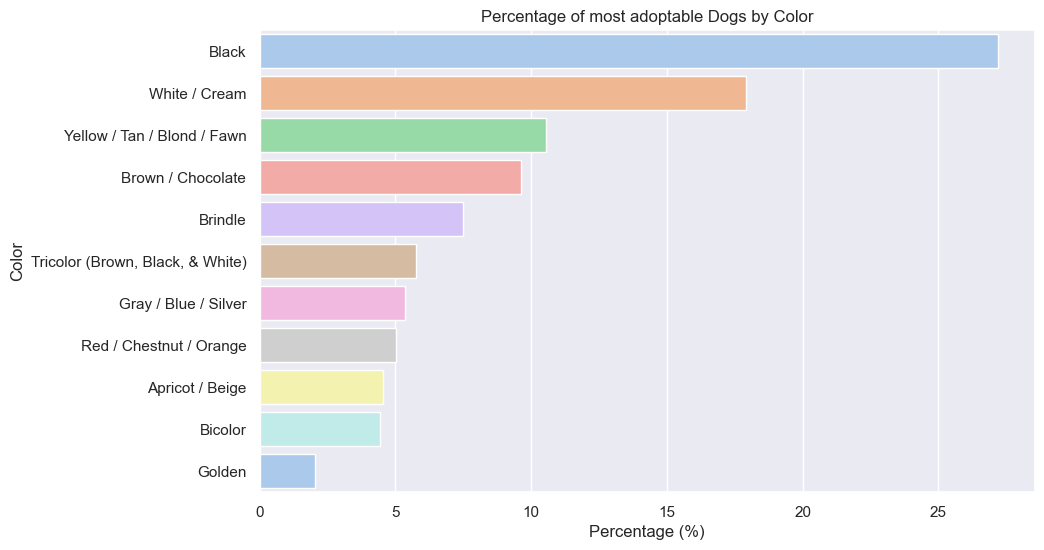

In [33]:
most_adoptable_color_counts = most_adoptable_color['count']
# Calculate the percentages
total_count = most_adoptable_color_counts.sum()
most_adoptable_color_percentages = (most_adoptable_color_counts / total_count) * 100

# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(x=most_adoptable_color_percentages, y= most_adoptable_color_counts.index, palette='pastel')

plt.xlabel('Percentage (%)')
plt.ylabel('Color')
plt.title('Percentage of most adoptable Dogs by Color')

# Annotate the bars with percentage values



plt.show()

Most adopted Color

In [34]:
most_adopted_color = color_df.loc[color_df['status'] == 'adopted']
most_adopted_color.set_index('colors.primary',inplace=True)
most_adopted_color

,status,count
colors.primary,,
Black,adopted,297
White / Cream,adopted,177
Yellow / Tan / Blond / Fawn,adopted,116
"Tricolor (Brown, Black, & White)",adopted,116
Brown / Chocolate,adopted,80
Apricot / Beige,adopted,68
Red / Chestnut / Orange,adopted,63
Brindle,adopted,56
Bicolor,adopted,53


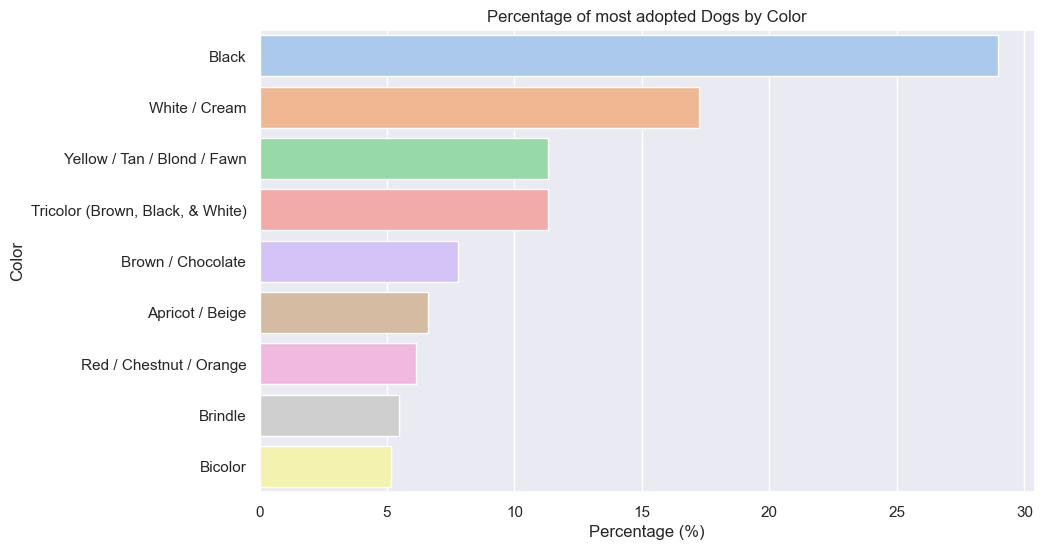

In [36]:
most_adopted_color_counts = most_adopted_color['count']
# Calculate the percentages
total_count = most_adopted_color_counts.sum()
most_adopted_color_percentages = (most_adopted_color_counts / total_count) * 100

# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(x=most_adopted_color_percentages, y= most_adopted_color_counts.index, palette='pastel')

plt.xlabel('Percentage (%)')
plt.ylabel('Color')
plt.title('Percentage of most adopted Dogs by Color')



plt.show()

1.536416320301299 0.14182808159905733


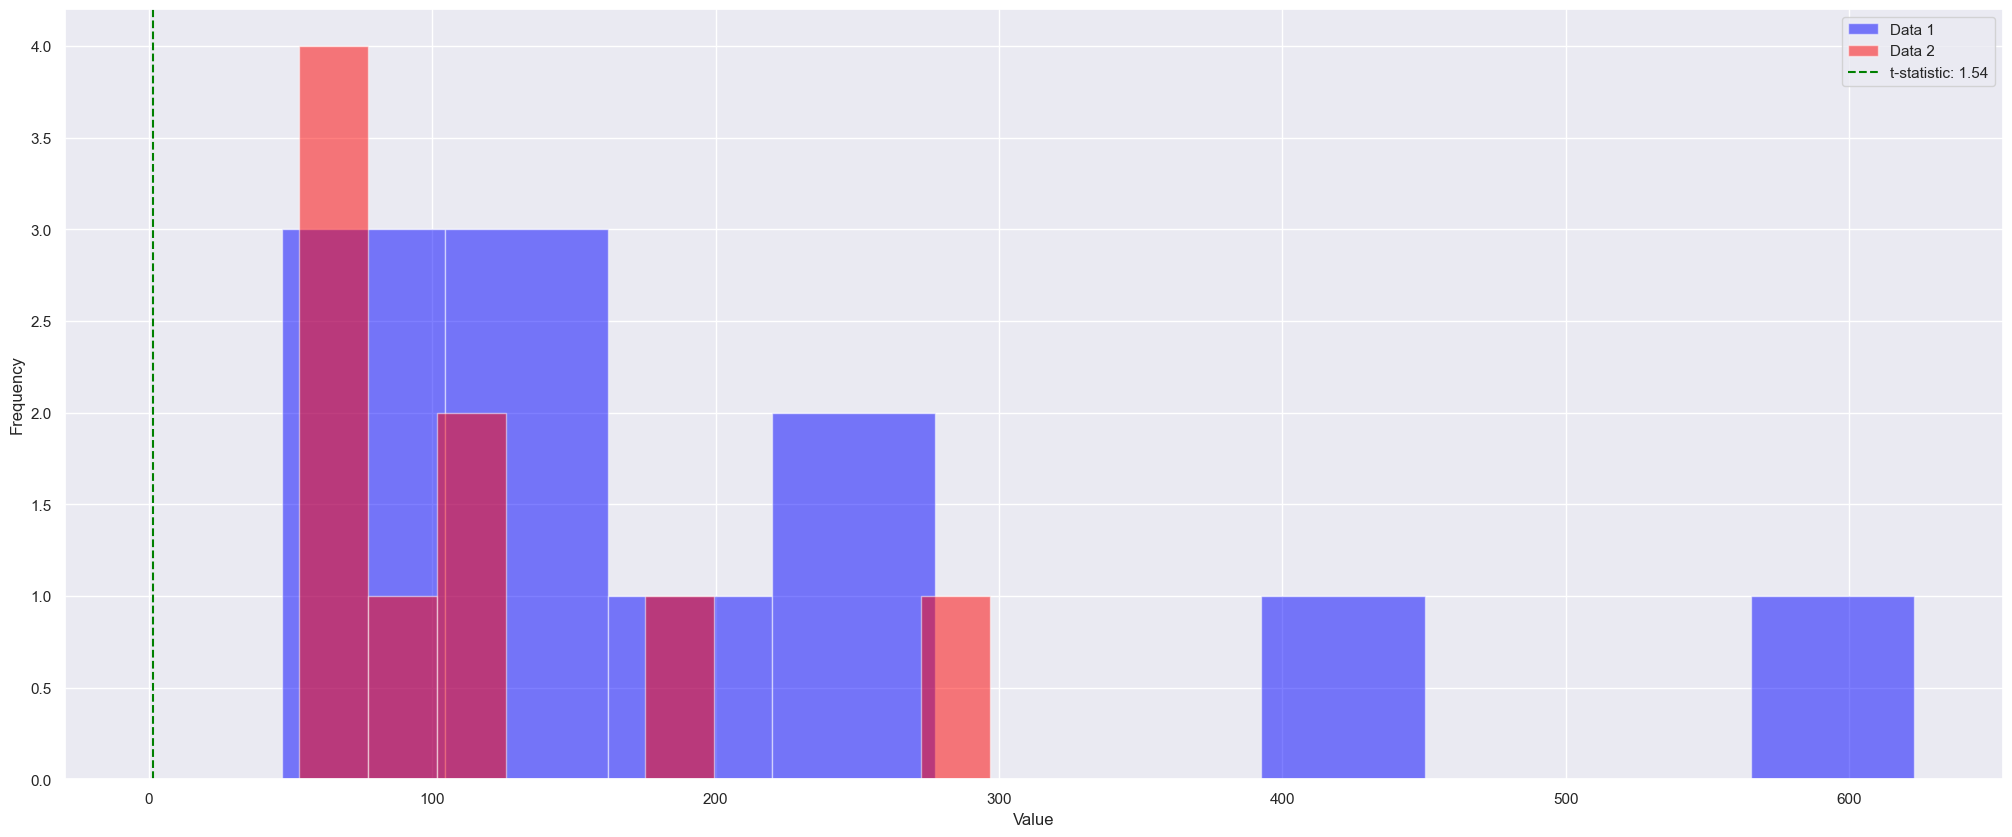

In [37]:
t_statistic, p_value = stats.ttest_ind(most_adoptable_color['count'], most_adopted_color['count'])

plt.hist(most_adoptable_color['count'], alpha=0.5, label='Data 1', color='blue')
plt.hist(most_adopted_color['count'], alpha=0.5, label='Data 2', color='red')

plt.axvline(x=t_statistic, color='green', linestyle='--', label=f't-statistic: {t_statistic:.2f}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

print(t_statistic,p_value)

***Age distribution according to status***

In [39]:
age_df= dogs.groupby(dogs['age'])['status'].value_counts().sort_values(ascending=False)
age_df = pd.DataFrame(age_df)
age_df = age_df.reset_index()
age_df

,age,status,count
0,Adult,adopted,1892
1,Adult,adoptable,1593
2,Baby,adoptable,1211
3,Young,adoptable,957
4,Young,adopted,828
5,Baby,adopted,825
6,Senior,adopted,390
7,Senior,adoptable,238


Most adoptable Age

In [40]:
most_adoptable_age = age_df.loc[age_df['status'] == 'adoptable']
most_adoptable_age.set_index('age',inplace=True)
most_adoptable_age

,status,count
age,,
Adult,adoptable,1593
Baby,adoptable,1211
Young,adoptable,957
Senior,adoptable,238


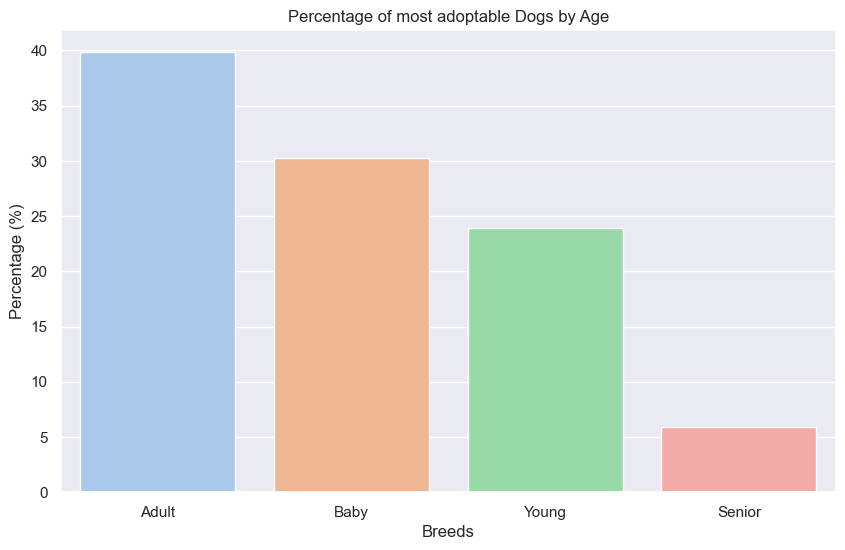

In [42]:
most_adoptable_age_counts = most_adoptable_age['count']
# Calculate the percentages
total_count = most_adoptable_age_counts.sum()
most_adopted_age_percentages = (most_adoptable_age_counts / total_count) * 100

# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(y=most_adopted_age_percentages, x= most_adoptable_age_counts.index, palette='pastel')

plt.ylabel('Percentage (%)')
plt.xlabel('Breeds')
plt.title('Percentage of most adoptable Dogs by Age')


plt.show()

Most adopted Age

In [43]:
most_adopted_age = age_df.loc[age_df['status'] == 'adopted']
most_adopted_age.set_index('age',inplace=True)
most_adopted_age

,status,count
age,,
Adult,adopted,1892
Young,adopted,828
Baby,adopted,825
Senior,adopted,390


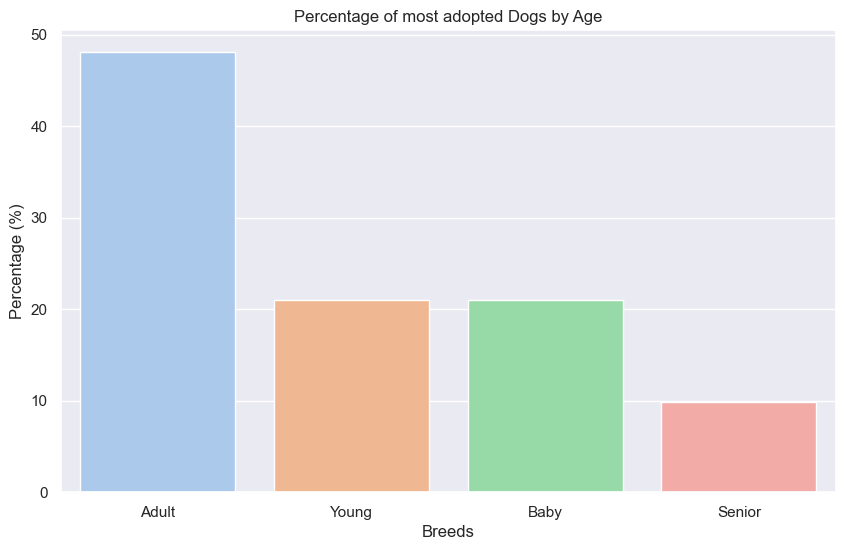

In [46]:
most_adopted_age_counts = most_adopted_age['count']
# Calculate the percentages
total_count = most_adopted_age_counts.sum()
most_adopted_age_percentages = (most_adopted_age_counts / total_count) * 100

# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(y=most_adopted_age_percentages, x= most_adopted_age_counts.index, palette='pastel')

plt.ylabel('Percentage (%)')
plt.xlabel('Breeds')
plt.title('Percentage of most adopted Dogs by Age')


plt.show()

***Breed distribution according to status***


In [48]:
breed_df= dogs.groupby(dogs['breeds.primary'])['status'].value_counts().sort_values(ascending=False)
breed_df = pd.DataFrame(breed_df)
breed_df = breed_df.reset_index()
breed_df

,breeds.primary,status,count
0,Pit Bull Terrier,adoptable,537
1,Mixed Breed,adoptable,461
2,Labrador Retriever,adopted,394
3,Chihuahua,adopted,335
4,Labrador Retriever,adoptable,310
...,...,...,...
304,Australian Terrier,adopted,1
305,Petit Basset Griffon Vendeen,adoptable,1
306,Pembroke Welsh Corgi,adopted,1
307,Norwegian Elkhound,adoptable,1


Top ten breeds which are adoptable

In [49]:
most_adoptable_breed = breed_df.loc[breed_df['status'] == 'adoptable'].head(10)
most_adoptable_breed.set_index('breeds.primary',inplace=True)
most_adoptable_breed

,status,count
breeds.primary,,
Pit Bull Terrier,adoptable,537
Mixed Breed,adoptable,461
Labrador Retriever,adoptable,310
Chihuahua,adoptable,190
German Shepherd Dog,adoptable,178
Terrier,adoptable,165
Shepherd,adoptable,127
American Staffordshire Terrier,adoptable,112
Boxer,adoptable,103


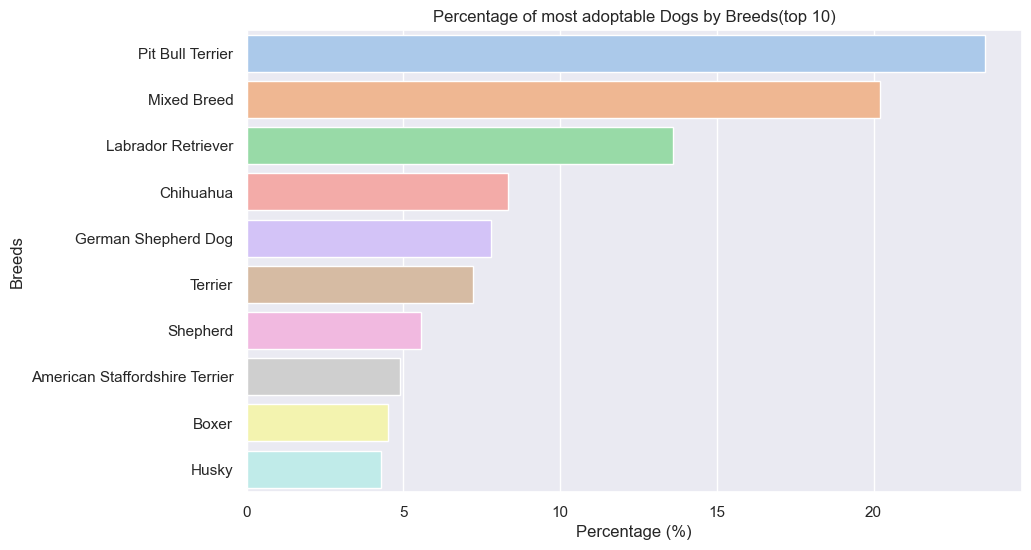

In [50]:
most_adoptable_breed_counts = most_adoptable_breed['count']
# Calculate the percentages
total_count = most_adoptable_breed_counts.sum()
most_adopted_breed_percentages = (most_adoptable_breed_counts / total_count) * 100

# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(x=most_adopted_breed_percentages, y= most_adoptable_breed_counts.index, palette='pastel')

plt.xlabel('Percentage (%)')
plt.ylabel('Breeds')
plt.title('Percentage of most adoptable Dogs by Breeds(top 10)')

plt.show()

Most adopted breed top 10

In [51]:
breed_df= dogs.groupby(dogs['breeds.primary'])['status'].value_counts().sort_values(ascending=False)
breed_df = pd.DataFrame(breed_df)
breed_df = breed_df.reset_index()
breed_df.columns

Index(['breeds.primary', 'status', 'count'], dtype='object')

In [52]:

most_adopted_breed = breed_df.loc[breed_df['status'] == 'adopted'].head(10)
most_adopted_breed.set_index('breeds.primary',inplace=True)
most_adopted_breed


,status,count
breeds.primary,,
Labrador Retriever,adopted,394
Chihuahua,adopted,335
Mixed Breed,adopted,245
Terrier,adopted,217
German Shepherd Dog,adopted,174
Pit Bull Terrier,adopted,139
Beagle,adopted,130
Husky,adopted,123
Shepherd,adopted,118


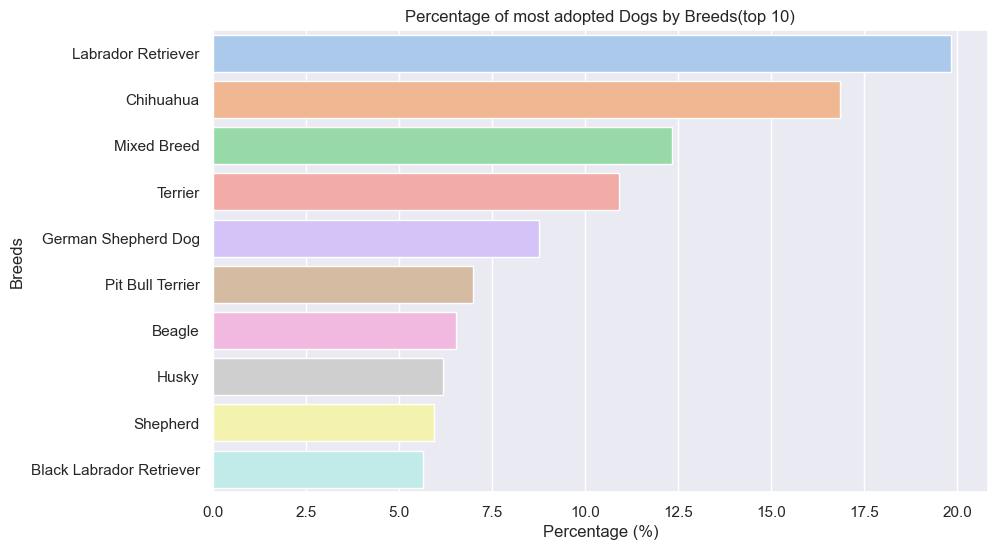

In [53]:
most_adopted_breed_counts = most_adopted_breed['count']
# Calculate the percentages
total_count = most_adopted_breed_counts.sum()
most_adopted_breed_percentages = (most_adopted_breed_counts / total_count) * 100

# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(x=most_adopted_breed_percentages, y= most_adopted_breed_counts.index, palette='pastel')

plt.xlabel('Percentage (%)')
plt.ylabel('Breeds')
plt.title('Percentage of most adopted Dogs by Breeds(top 10)')


plt.show()

Data for Organization

In [273]:
merged_df.columns

Index(['id', 'organization_id', 'organization_id', 'url', 'species', 'age',
       'gender', 'size', 'coat', 'tags', 'name', 'description',
       'organization_animal_id', 'photos', 'status', 'status_changed_at',
       'published_at', 'distance', 'breeds.primary', 'breeds.secondary',
       'breeds.mixed', 'breeds.unknown', 'colors.primary', 'colors.secondary',
       'colors.tertiary', 'attributes.special_needs',
       'attributes.shots_current', 'environment.children', 'environment.dogs',
       'environment.cats', 'contact.address.address1',
       'contact.address.address2', 'contact.address.city',
       'contact.address.state', 'contact.address.postcode',
       'contact.address.country', 'animal_id', 'animal_type',
       'organization_id', 'organization_id', 'days_on_petfinder', 'today',
       'adoptable_days_online', 'address'],
      dtype='object')

In [55]:
#Create a new dataframe fro the organizations from where you can adopt a pet
cities_df =pd.DataFrame()
cities_df['City']=dogs['contact.address.city']
cities_df['Address']=dogs['contact.address.address1']
cities_df['State']=dogs['contact.address.state']
cities_df['url']=dogs['url']
cities_df['species'] =dogs['species']
cities_df['status'] = dogs['status']
cities_df["Lat"] = ""
cities_df["Lon"] = ""
cities_df

,City,Address,State,url,species,status,Lat,Lon
0,Tinley Park,8301 West 191st Street,IL,https://www.petfinder.com/dog/maisy-69339698/i...,Dog,adoptable,,
1,Tinley Park,8301 West 191st Street,IL,https://www.petfinder.com/dog/travis-kelce-693...,Dog,adoptable,,
2,Tinley Park,8301 West 191st Street,IL,https://www.petfinder.com/dog/fat-boy-69339553...,Dog,adoptable,,
3,Tinley Park,8301 West 191st Street,IL,https://www.petfinder.com/dog/perdita-69339397...,Dog,adoptable,,
4,Tinley Park,8301 West 191st Street,IL,https://www.petfinder.com/dog/marcus-69339271/...,Dog,adoptable,,
...,...,...,...,...,...,...,...,...
7929,Genoa,16173 Baseline Road,IL,https://www.petfinder.com/dog/fergie-66447254/...,Dog,adopted,,
7930,Genoa,16173 Baseline Road,IL,https://www.petfinder.com/dog/06-0617-66447260...,Dog,adopted,,
7931,Genoa,16173 Baseline Road,IL,https://www.petfinder.com/dog/emmitt-66447266/...,Dog,adopted,,
7932,Genoa,16173 Baseline Road,IL,https://www.petfinder.com/dog/bella-66447273/i...,Dog,adopted,,


In [56]:
#Drop duplicate 
cities_df.drop_duplicates(subset='Address', keep='first', inplace=True)
cities_df

,City,Address,State,url,species,status,Lat,Lon
0,Tinley Park,8301 West 191st Street,IL,https://www.petfinder.com/dog/maisy-69339698/i...,Dog,adoptable,,
9,Waukesha,NaN,WI,https://www.petfinder.com/dog/ripley-69338238/...,Dog,adoptable,,
15,Matteson,21800 Central Ave,IL,https://www.petfinder.com/dog/pippin-69336962/...,Dog,adoptable,,
17,Brookfield,20950 Enterprise Avenue,WI,https://www.petfinder.com/dog/bandit-69336922/...,Dog,adoptable,,
21,South Haven,07591 Blue Star Hwy,MI,https://www.petfinder.com/dog/dyson-69336270/m...,Dog,adoptable,,
...,...,...,...,...,...,...,...,...
3495,Winnebago,PO Box 243,IL,https://www.petfinder.com/dog/danny-boy-650034...,Dog,adoptable,,
3502,Oswego,1280 Route 34 (New facility!!),IL,https://www.petfinder.com/dog/pyro-oswego-6498...,Dog,adoptable,,
3960,Janesville,4700 S County Trunk Highway G,WI,https://www.petfinder.com/dog/kenneth-60977057...,Dog,adoptable,,
4024,St. John,10801 Wicker Ave.,IN,https://www.petfinder.com/dog/florance-6928813...,Dog,adopted,,


Get the latitude and longitude for the city where the organization is based

In [164]:
# Define the API parameters
params = {
    "apiKey":geoapify_key,
    "format":"json"
}

# Set base URL
base_url = "https://api.geoapify.com/v1/geocode/search"

In [165]:
# Print a message to follow up the airport search


# Loop through the cities_pd DataFrame and search coordinates for each city
for index, row in cities_df.iterrows():

    # Get the city's name & add ", Australia" to the string so geoapify finds the correct city
    city = row["City"] +"," +row["State"]+ ", US"

    # Add the current city to the parameters
    params["text"] = f"{city}"

    # Make the API request
    response = requests.get(base_url, params=params)
    
    # Convert response to JSON
    response = response.json()
  

    # Extract latitude and longitude
    cities_df.loc[index, "Lat"] = response["results"][0]["lat"]
    cities_df.loc[index, "Lon"] = response["results"][0]["lon"]
    
# Display sample data to confirm that the coordinates appear
cities_df.head()

,City,Address,State,url,Lat,Lon
0,Huntley,"13005 Ernesti Rd, None, Huntley, IL, 60142, US",IL,https://www.petfinder.com/dog/taz-69357341/il/...,42.17225,-88.42692
1,Grovertown,"None, None, Grovertown, IN, 46531, US",IN,https://www.petfinder.com/dog/abe-69357338/in/...,41.375043,-86.504734
3,Waukesha,"701 Northview Road, PO Box 834, Waukesha, WI, ...",WI,https://www.petfinder.com/dog/uncle-frank-6935...,43.011678,-88.231481
4,Bristol,"54687 County Road 19, None, Bristol, IN, 46507...",IN,https://www.petfinder.com/dog/mars-69356461/in...,41.721441,-85.817536
5,Muskego,"None, None, Muskego, WI, 53150, US",WI,https://www.petfinder.com/dog/luna-the-cattle-...,42.905848,-88.138978


In [169]:
%%capture --no-display



# Create a map using hvplot
map_plot =cities_df.hvplot.points("Lon", 
                                   "Lat", 
                                   geo = True,
                                   frame_width=500,
                                   frame_height=500,
                                   color = "City",
                                   alpha = 0.8,
                                   size = 100,
                                   tiles = "OSM",
                                   hover_cols = ["Address","url"]
                                  )

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City,Address,url)

In [288]:
top_organization = cities_df.groupby(cities_df['Address'])[['status']].value_counts().sort_values(ascending=False)
top_organization = pd.DataFrame(top_organization)
top_organization = top_organization.reset_index()

top_organization

,Address,status,count
0,"16173 Baseline Road, None, Genoa, IL, 60135, US",adopted,1240
1,"None, None, Salem, WI, 53168, US",adopted,878
2,"None, None, Morton Grove, IL, 60053, US",adoptable,302
3,"2975 N Milwaukee Ave, None, Northbrook, IL, 60...",adoptable,164
4,"13005 Ernesti Rd, None, Huntley, IL, 60142, US",adopted,138
...,...,...,...
433,"None, None, Antioch, IL, 60002, US",adoptable,1
434,"None, None, Mundelein, IL, 60060, US",adoptable,1
435,"None, None, Arlington Heights, IL, 60004, US",adoptable,1
436,"None, None, Mount Prospect, IL, 60056, US",adoptable,1


**Top Organization from where dogs were adopted**

In [285]:
top_organization_apoted_df=top_organization.loc[top_organization['status'] == 'adopted'].head(10)
top_organization_apoted_df.set_index('Address',inplace=True)
top_organization_apoted_df


,status,count
Address,,
"16173 Baseline Road, None, Genoa, IL, 60135, US",adopted,1240
"None, None, Salem, WI, 53168, US",adopted,878
"13005 Ernesti Rd, None, Huntley, IL, 60142, US",adopted,138
"None, None, Hillside, IL, 60162, US",adopted,76
"S47 W30760 State Road 59, None, North Prairie, WI, 53153, US",adopted,75
"2250 Barber Greene Road, None, DeKalb, IL, 60115, US",adopted,56
"PO Box 4074, None, Aurora, IL, 60507, US",adopted,54
"21 Salt Creek Lane, None, Hinsdale, IL, 60521, US",adopted,51
"6379 N Paulina St., (Corner of Paulina and Devon), Chicago, IL, 60660, US",adopted,51


**Top Organization where more dogs are adoptable**

In [283]:
top_organization_adoptable_df=top_organization.loc[top_organization['status'] == 'adoptable'].head(10)
top_organization_adoptable_df.set_index('Address',inplace=True)
top_organization_adoptable_df


,status,count
Address,,
"None, None, Morton Grove, IL, 60053, US",adoptable,302
"2975 N Milwaukee Ave, None, Northbrook, IL, 60062, US",adoptable,164
"13005 Ernesti Rd, None, Huntley, IL, 60142, US",adoptable,110
"None, None, Downers Grove, IL, 60516, US",adoptable,88
"21800 Central Ave, None, Matteson, IL, 60443, US",adoptable,81
"2741 S. Western Ave., None, Chicago, IL, 60608, US",adoptable,77
"None, None, Orland Park, IL, 60462, US",adoptable,67
"1000 S. LaFox St. (Route 31), None, South Elgin, IL, 60177, US",adoptable,63
"None, None, Oswego, IL, 60543, US",adoptable,63


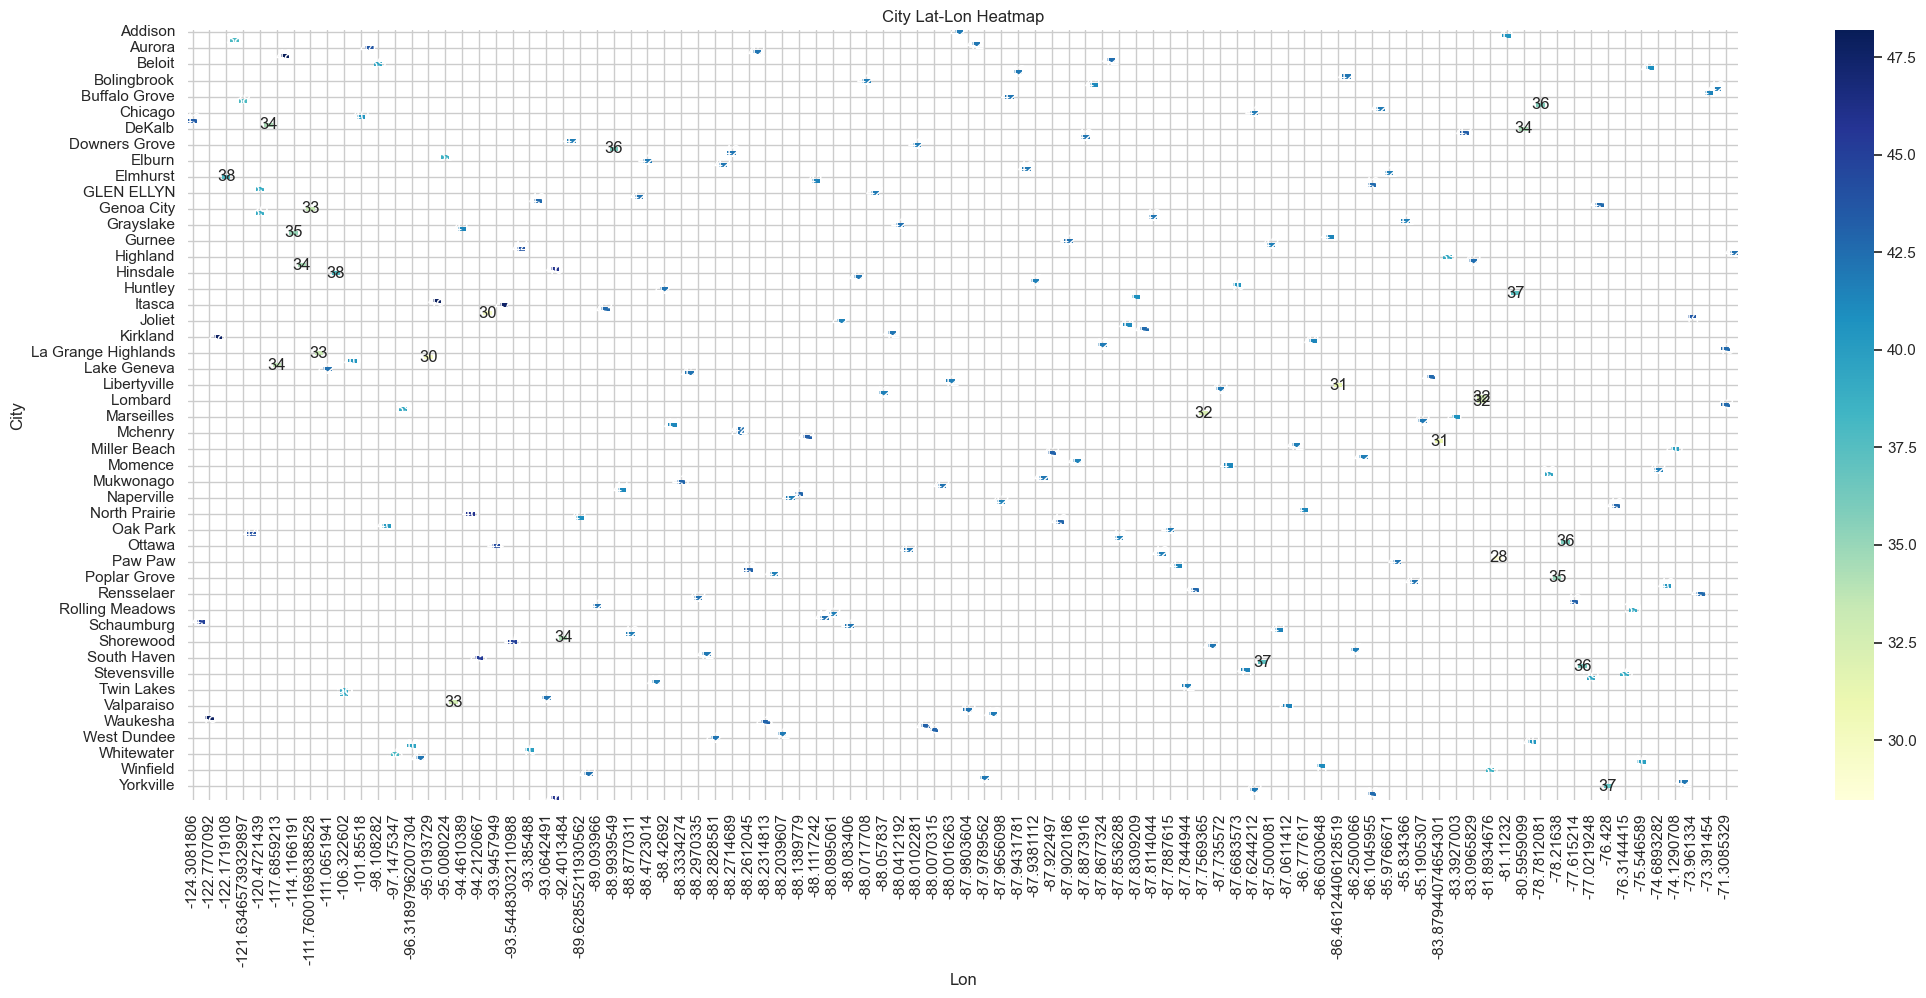

In [132]:
# Create a heatmap using Seaborn
sns.set(style="whitegrid")  # Optional style settings

# Pivot the data to create a suitable format for the heatmap
heatmap_data = cities_df.pivot_table(index='City', values='Lat', columns='Lon')

ax = sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")

# Customize the plot
plt.title("City Lat-Lon Heatmap")
plt.show()